<a id="1"></a>
# <div style="padding: 20px; color: cyan; margin: 0; font-size: 30px; font-family: Arial; text-align: left; border-radius: 5px; background-color: #000000; border: 2px solid blue;"><b>Machine Learning Model</b></div>

In [18]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.preprocessing
from tensorflow import keras

<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #008B8B; padding: 15px; border-top: 2px solid blue; border-bottom: 2px solid blue;
"><b>Data </b> Preparation

In [19]:
df = pd.read_csv("../data/processed/processed_data.csv")
df.head(5)

,name,designer,artist,min_players,max_players,min_playtime,max_playtime,playing_time,min_age,complexity_rating,user_ratings,user_comments,type,category,mechanism,year,average_rating
0,Samurai,Reiner Knizia,Franz Vohwinkel,2,4,30,60,45,10,2.47,16000,4000,Strategy,Abstract Strategy,Area Majority / Influence,1998.0,7.5
1,Samurai,Reiner Knizia,Franz Vohwinkel,2,4,30,60,45,10,2.47,16000,4000,Strategy,Abstract Strategy,Hand Management,1998.0,7.5
2,Samurai,Reiner Knizia,Franz Vohwinkel,2,4,30,60,45,10,2.47,16000,4000,Strategy,Abstract Strategy,Hexagon Grid,1998.0,7.5
3,Samurai,Reiner Knizia,Franz Vohwinkel,2,4,30,60,45,10,2.47,16000,4000,Strategy,Abstract Strategy,Once-Per-Game Abilities,1998.0,7.5
4,Samurai,Reiner Knizia,Franz Vohwinkel,2,4,30,60,45,10,2.47,16000,4000,Strategy,Abstract Strategy,Set Collection,1998.0,7.5


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42369 entries, 0 to 42368
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               42369 non-null  object 
 1   designer           42369 non-null  object 
 2   artist             42369 non-null  object 
 3   min_players        42369 non-null  int64  
 4   max_players        42369 non-null  int64  
 5   min_playtime       42369 non-null  int64  
 6   max_playtime       42369 non-null  int64  
 7   playing_time       42369 non-null  int64  
 8   min_age            42369 non-null  int64  
 9   complexity_rating  42369 non-null  float64
 10  user_ratings       42369 non-null  int64  
 11  user_comments      42369 non-null  int64  
 12  type               42369 non-null  object 
 13  category           42369 non-null  object 
 14  mechanism          42369 non-null  object 
 15  year               42369 non-null  float64
 16  average_rating     423

<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #008B8B; padding: 15px; border-top: 2px solid blue; border-bottom: 2px solid blue;
"><b>Feature </b> engineering

In [21]:
df.drop(columns=['name', 'designer', 'artist', 'year'], inplace=True)
df.head()

,min_players,max_players,min_playtime,max_playtime,playing_time,min_age,complexity_rating,user_ratings,user_comments,type,category,mechanism,average_rating
0,2,4,30,60,45,10,2.47,16000,4000,Strategy,Abstract Strategy,Area Majority / Influence,7.5
1,2,4,30,60,45,10,2.47,16000,4000,Strategy,Abstract Strategy,Hand Management,7.5
2,2,4,30,60,45,10,2.47,16000,4000,Strategy,Abstract Strategy,Hexagon Grid,7.5
3,2,4,30,60,45,10,2.47,16000,4000,Strategy,Abstract Strategy,Once-Per-Game Abilities,7.5
4,2,4,30,60,45,10,2.47,16000,4000,Strategy,Abstract Strategy,Set Collection,7.5


In [22]:
def convertCategoryToIndex(value, category):
    return category.index(value)

## Convert data to float in column type, category and mechanism

In [23]:
df['average_rating'] = df['average_rating'] * 10
df['average_rating'] = df['average_rating'].astype('int')
df['type'] = df['type'].apply(convertCategoryToIndex, category = list(df['type'].unique()))
df['category'] = df['category'].apply(convertCategoryToIndex, category = list(df['category'].unique()))
df['mechanism'] = df['mechanism'].apply(convertCategoryToIndex, category = list(df['mechanism'].unique()))
# df = pd.get_dummies(df)
# label = df['average_rating']
# df.drop(columns=['average_rating'], inplace=True)
# df.drop(columns=['type', 'category', 'mechanism'], inplace=True)
# df = pd.concat([df, label], axis=1)
df.head(5)

,min_players,max_players,min_playtime,max_playtime,playing_time,min_age,complexity_rating,user_ratings,user_comments,type,category,mechanism,average_rating
0,2,4,30,60,45,10,2.47,16000,4000,0,0,0,75
1,2,4,30,60,45,10,2.47,16000,4000,0,0,1,75
2,2,4,30,60,45,10,2.47,16000,4000,0,0,2,75
3,2,4,30,60,45,10,2.47,16000,4000,0,0,3,75
4,2,4,30,60,45,10,2.47,16000,4000,0,0,4,75


## Min-Max scale value to 0-1

In [24]:
columns = df.columns[:-1]
for column in columns:
    scaler = sklearn.preprocessing.MinMaxScaler()
    df[column] = scaler.fit_transform(df[column].to_numpy().reshape(-1, 1))
df.head(5)

,min_players,max_players,min_playtime,max_playtime,playing_time,min_age,complexity_rating,user_ratings,user_comments,type,category,mechanism,average_rating
0,0.25,0.030612,0.060543,0.082058,0.073456,0.285714,0.3675,0.130074,0.190476,0.0,0.0,0.000000,75
1,0.25,0.030612,0.060543,0.082058,0.073456,0.285714,0.3675,0.130074,0.190476,0.0,0.0,0.005051,75
2,0.25,0.030612,0.060543,0.082058,0.073456,0.285714,0.3675,0.130074,0.190476,0.0,0.0,0.010101,75
3,0.25,0.030612,0.060543,0.082058,0.073456,0.285714,0.3675,0.130074,0.190476,0.0,0.0,0.015152,75
4,0.25,0.030612,0.060543,0.082058,0.073456,0.285714,0.3675,0.130074,0.190476,0.0,0.0,0.020202,75


In [25]:
df = df.sample(frac=1, replace = False)
df.head(5)

,min_players,max_players,min_playtime,max_playtime,playing_time,min_age,complexity_rating,user_ratings,user_comments,type,category,mechanism,average_rating
29289,0.25,0.051020,0.123173,0.123783,0.123539,0.392857,0.254877,0.000024,0.000190,0.074074,0.065217,0.717172,79
12697,0.25,0.010204,0.248434,0.165508,0.198664,0.357143,0.254877,0.000138,0.000238,0.074074,0.489130,0.040404,75
3199,0.50,0.040816,0.102296,0.082058,0.090150,0.357143,0.355000,0.028447,0.052381,0.185185,0.108696,0.005051,73
31567,0.25,0.030612,0.050104,0.061196,0.056761,0.428571,0.500000,0.000919,0.002714,0.074074,0.815217,0.121212,61
25393,0.00,0.051020,0.039666,0.054242,0.048414,0.214286,0.254877,0.000098,0.000048,0.074074,0.065217,0.040404,72


In [26]:
train_sample, test_sample = df.iloc[:round(df.shape[0] * 0.8)][:], df.iloc[round(df.shape[0] * 0.8):][:]
print(
    f"Train shape: {train_sample.shape}\n",
    f"Test shape: {test_sample.shape}"
)

Train shape: (33895, 13)
 Test shape: (8474, 13)


<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #008B8B; padding: 15px; border-top: 2px solid blue; border-bottom: 2px solid blue;
"><b>Training </b> model

# Model Decision Tree

In [27]:
def getTrainValSample(data, fold):
    beginPos = round(data.shape[0] * fold / 10)
    length = round(data.shape[0] * 1 / 10)

    train = pd.concat([data.iloc[0 : beginPos][:], data.iloc[beginPos + length:][:]]).to_numpy()
    val = data.iloc[beginPos: beginPos + length][:].to_numpy()

    x_train, y_train = train[:, :-1], train[:, -1]
    x_val, y_val = val[:, :-1], val[:, -1]
    return (x_train, y_train), (x_val, y_val)

In [28]:
train_errors_decision_tree = []
val_errors_decision_tree = []
for i in range(10):
    train, val = getTrainValSample(train_sample, i)
    model = DecisionTreeClassifier(criterion="gini")
    model.fit(train[0], train[1])
    train_errors_decision_tree.append(model.score(train[0], train[1]))
    val_errors_decision_tree.append(model.score(val[0], val[1]))
    
decisionModel = pd.DataFrame({'Train Accuracy': train_errors_decision_tree,
                 'Validation Accuracy': val_errors_decision_tree
                 })

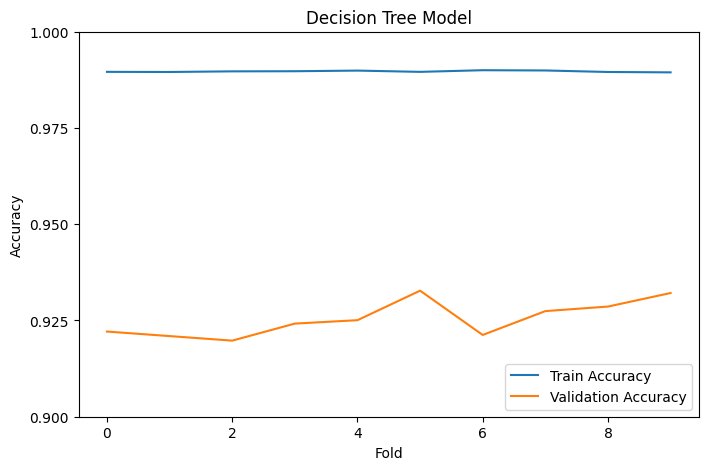

In [29]:
fig, ax = plt.subplots(figsize=(8, 5))
decision_tree_train_line, = ax.plot(decisionModel['Train Accuracy'])
decision_tree_val_line, = ax.plot(decisionModel['Validation Accuracy'])
ax.set_title("Decision Tree Model")
ax.set_xlabel("Fold")
ax.set_ylabel("Accuracy")
ax.set_yticks(np.linspace(0.9, 1, num=5))
ax.legend([decision_tree_train_line, decision_tree_val_line], decisionModel.columns, loc = "lower right")
plt.show()

In [30]:
train_errors_bayes = []
val_errors_bayes = []
for i in range(10):
    train, val = getTrainValSample(train_sample, i)
    model = GaussianNB()
    model.fit(train[0], train[1])
    train_errors_bayes.append(model.score(train[0], train[1]))
    val_errors_bayes.append(model.score(val[0], val[1]))
    
BayesModel = pd.DataFrame({'Train Accuracy': train_errors_bayes,
                 'Validation Accuracy': val_errors_bayes
                 })

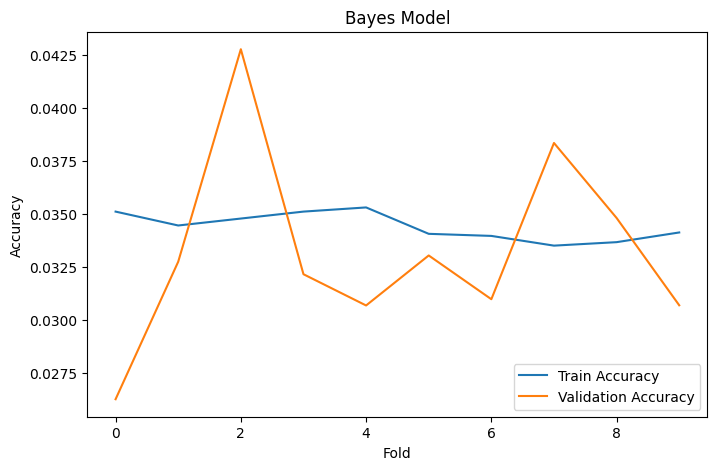

In [35]:
fig, ax = plt.subplots(figsize=(8, 5))
decision_tree_train_line, = ax.plot(BayesModel['Train Accuracy'])
decision_tree_val_line, = ax.plot(BayesModel['Validation Accuracy'])
ax.set_title("Bayes Model")
ax.set_xlabel("Fold")
ax.set_ylabel("Accuracy")
ax.legend([decision_tree_train_line, decision_tree_val_line], decisionModel.columns, loc = "lower right")
plt.show()

In [33]:
train_errors_FC = []
val_errors_FC = []
for i in range(10):
    train, val = getTrainValSample(train_sample, i)
    x_train = tf.convert_to_tensor(train[0], dtype='float32')
    y_train = tf.convert_to_tensor(train[1])
    x_val = tf.convert_to_tensor(val[0], dtype='float32')
    y_val = tf.convert_to_tensor(val[1])

    model = keras.Sequential(
            [
                keras.Input(shape=(12, ), name = "Input"),
                keras.layers.Dense(512, activation='relu'),
                keras.layers.Dense(1024, activation='relu'),
                keras.layers.Dense(512, activation='relu'),
                keras.layers.Dense(101, activation='softmax', name = 'output'),
            ]
        )
    model.compile(
            optimizer=keras.optimizers.SGD(),
            loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=[keras.metrics.SparseTopKCategoricalAccuracy()]
        )
    history = model.fit(x_train, 
                                y_train,
                                batch_size=32,
                                epochs=5,
                                validation_data=(x_val, y_val),
                            )
    
    train_errors_FC.append(history.history['val_sparse_top_k_categorical_accuracy'][-1])
    val_errors_FC.append(history.history['sparse_top_k_categorical_accuracy'][-1])
    
FCModel = pd.DataFrame({'Train Accuracy': train_errors_FC,
                 'Validation Accuracy': val_errors_FC
                 })

Epoch 1/5
954/954 [==============================] - 11s 11ms/step - loss: 4.3054 - sparse_top_k_categorical_accuracy: 0.1995 - val_loss: 3.9660 - val_sparse_top_k_categorical_accuracy: 0.1920
Epoch 2/5
954/954 [==============================] - 11s 11ms/step - loss: 3.9034 - sparse_top_k_categorical_accuracy: 0.2128 - val_loss: 3.9042 - val_sparse_top_k_categorical_accuracy: 0.1920
Epoch 3/5
954/954 [==============================] - 11s 11ms/step - loss: 3.8789 - sparse_top_k_categorical_accuracy: 0.2138 - val_loss: 3.8840 - val_sparse_top_k_categorical_accuracy: 0.1941
Epoch 4/5
954/954 [==============================] - 10s 11ms/step - loss: 3.8663 - sparse_top_k_categorical_accuracy: 0.2160 - val_loss: 3.8764 - val_sparse_top_k_categorical_accuracy: 0.2139
Epoch 5/5
954/954 [==============================] - 11s 11ms/step - loss: 3.8490 - sparse_top_k_categorical_accuracy: 0.2247 - val_loss: 3.8548 - val_sparse_top_k_categorical_accuracy: 0.2251
Epoch 1/5
954/954 [================

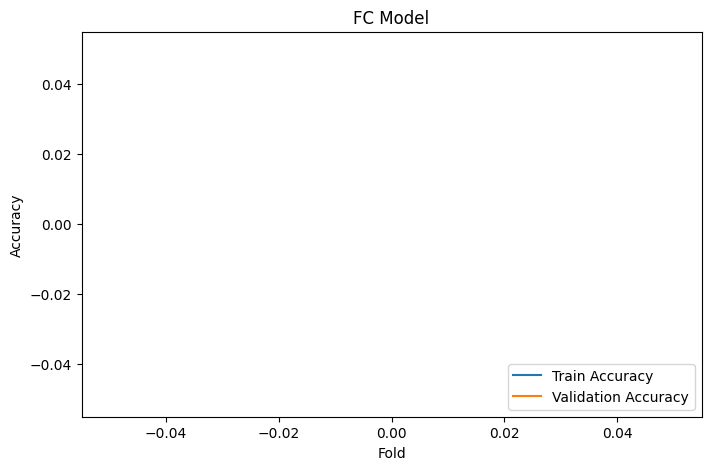

In [36]:
fig, ax = plt.subplots(figsize=(8, 5))
decision_tree_train_line, = ax.plot(FCModel['Train Accuracy'])
decision_tree_val_line, = ax.plot(FCModel['Validation Accuracy'])
ax.set_title("FC Model")
ax.set_xlabel("Fold")
ax.set_ylabel("Accuracy")
ax.legend([decision_tree_train_line, decision_tree_val_line], decisionModel.columns, loc = "lower right")
plt.show()

<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #008B8B; padding: 15px; border-top: 2px solid blue; border-bottom: 2px solid blue;
"><b>Evaluation </b>

<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #008B8B; padding: 15px; border-top: 2px solid blue; border-bottom: 2px solid blue;
"><b>Prediction </b>

<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #008B8B; padding: 15px; border-top: 2px solid blue; border-bottom: 2px solid blue;
"><b>Results </b> analysis

<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #008B8B; padding: 15px; border-top: 2px solid blue; border-bottom: 2px solid blue;
"><b>Conclusion </b> 